# Polynomial Linear Regression

## Import Required Libs and Import the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Find a Relationship

Text(0, 0.5, 'CO2EMISSIONS')

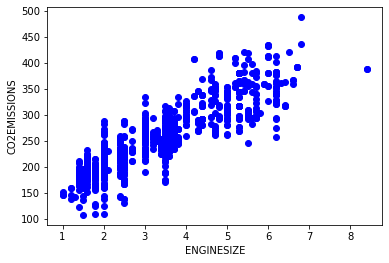

In [7]:
plt.scatter(df['ENGINESIZE'],df['CO2EMISSIONS'], color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

## Polynomial Linear Regression

As it can be seen simple linear regression cannot model very well. So, I am going to model with a polynomial of degree 2

Text(0, 0.5, 'CO2EMISSIONS')

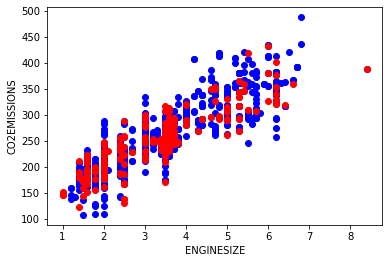

In [22]:
# Make the Data Ready for the training

X = df[['ENGINESIZE']].to_numpy()
y= df[['CO2EMISSIONS']].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train,y_train, color = 'blue')
plt.scatter(X_test,y_test, color = 'red')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')


In [30]:
# Getting ready for the training

from sklearn.preprocessing import PolynomialFeatures

polyScaler = PolynomialFeatures(degree = 2)

X_train_poly = polyScaler.fit_transform(X_train)

# import the trainer

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_poly,y_train)

print("Trained model is: Coefficients = ",reg.coef_," Intercept = ", reg.intercept_)

Trained model is: Coefficients =  [[ 0.         49.3519142  -1.30858881]]  Intercept =  [109.15906294]


## Visualization


Text(0, 0.5, 'CO2EMISSIONS')

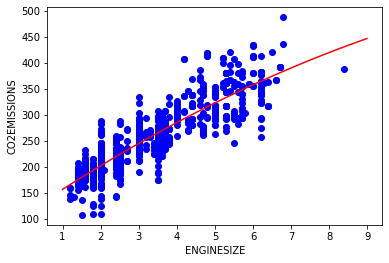

In [36]:
X_vsl =np.arange(1,9, 0.01)
y_vsl = reg.coef_[0][1]*(X_vsl) + reg.coef_[0][2]*(X_vsl**2) + reg.intercept_

plt.plot(X_vsl,y_vsl,'r-')
plt.scatter(X_train,y_train, color = 'blue')


plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

## Evaluation


In [47]:
# import Messure

from sklearn.metrics import r2_score

# predict

y_test_predict = reg.predict(polyScaler.fit_transform(X_test))

err = r2_score(y_test_predict,y_test)

print("Error is equal to %.3f"%err)


Error is equal to 0.720


The results show that it is not that much acceptable.